Determining discrete cosine transform of an image and showing how DCT can be used to compress the given image.

In [16]:
pip install opencv-python

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct,idct
import cv2

In [77]:
img = cv2.imread('lenna_grey.jpg',0) # Using 0 to read image in grayscale mode
img.shape

(225, 225)

In [78]:
row,col = img.shape
N=8

In [79]:
img_dct = np.zeros((row,col),dtype = int)
for r in range(0,row//N):
    for c in range(0,col//N):
        img_dct[r*N:(r+1)*N,c*N:(c+1)*N] = dct(img[r*N:(r+1)*N,c*N:(c+1)*N])
               

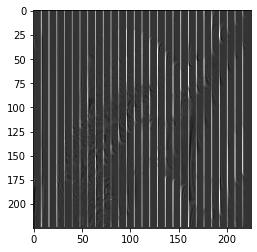

In [80]:
plt.imshow(img_dct,cmap='gray') # Here at white stips dct coeff has very large value and we took slicing as 8 so at every 8th 
#column as we are retaining only one co-eff

In [81]:
img_idct = np.zeros((row,col),dtype=int)
for r in range(0,row//N):
    for c in range(0,col//N):
        img_idct[r*N:(r+1)*N,c*N:(c+1)*N] = idct(img_dct[r*N:(r+1)*N,c*N:(c+1)*N])


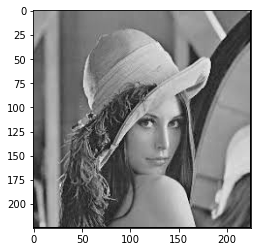

In [82]:
plt.imshow(img_idct,cmap="gray")

In [87]:
for r in range(0,row//N):
    for c in range(0,col//N):
        #img_dct[r*N:(r+1)*N,c*N:(c+1)*N] = dct(img[r*N:(r+1)*N,c*N:(c+1)*N])
        temp1=dct(img[r*N:(r+1)*N,c*N:(c+1)*N])
        temp1[4:7,4:7]=0
        img_dct[r*N:(r+1)*N,c*N:(c+1)*N]=temp1

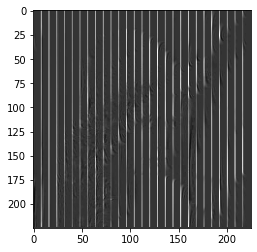

In [88]:
plt.imshow(img_dct,cmap='gray')

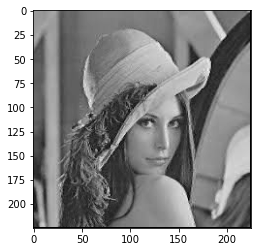

In [89]:
img_idct = np.zeros((row,col),dtype=int)
for r in range(0,row//N):
    for c in range(0,col//N):
        img_idct[r*N:(r+1)*N,c*N:(c+1)*N] = idct(img_dct[r*N:(r+1)*N,c*N:(c+1)*N])
plt.imshow(img_idct,cmap="gray")

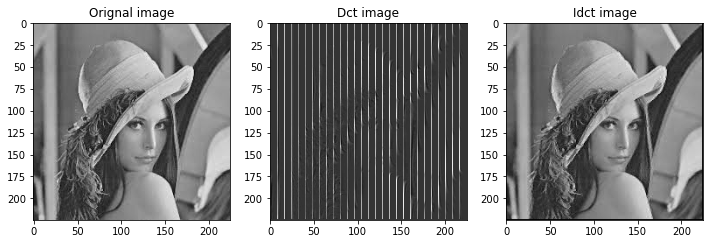

In [90]:
plt.figure(figsize=(12,12))
plt.subplot(1,3,1)
plt.title("Orignal image")
plt.imshow(img,cmap="gray")
plt.subplot(1,3,2)
plt.title("Dct image")
plt.imshow(img_dct,cmap="gray")
plt.subplot(1,3,3)
plt.title("Idct image")
plt.imshow(img_idct,cmap="gray")

When DCT is performed under the given image (lenna_grey). DCT of given image is computed and inverse of the same DCT is calculated we get same image back. If last 4 rows and columns of orignal image are converted to 0 then inverse DCT of the given image shows almost similar quality of orignal image. This shows that top 48 out of 64 co-eff are retained to get acceptable quality of image. If last 6 rows and cols are removed to compressed the image then the inverse dct of the image shows significant distortion in the image. Same results are obserged if the given image is test.png .